# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [111]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

In [112]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [113]:
# Dataset url
url = "datasets/dataCluster/SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [115]:
# Print the dataframe
df

x1         x2        x3        x4         x5         x6
0     1.914825  -1.380503 -3.609674  4.236011  -5.158681   5.712978
1     1.356415   9.767893  7.263659  8.750819   5.568930  -6.039122
2     1.185186  11.528344  9.999419  7.890027   7.308210  -8.899397
3    -1.739155  12.648965  7.965588  7.850296  10.235743 -10.175542
4     7.890985  -3.210880 -7.672016  2.438106   3.310904  -3.308334
...        ...        ...       ...       ...        ...        ...
1019  3.685106  -1.715503 -5.674443  6.510551  -0.121862  -6.166649
1020 -7.014173  -9.697874  4.093272 -0.590262  -9.882245   2.339336
1021 -2.993762   7.528182  7.877165  8.895835   9.318544  -7.445100
1022  4.576644  -1.720788 -6.581909  4.745839   1.497980  -4.828975
1023  2.616634   0.274593 -5.521864  9.582110   0.878266  -8.274990

[1024 rows x 6 columns]

In [10]:
# get the number of observations and variables

df.shape

(1024, 6)

2. Drop rows with any missing values


In [116]:
# Drop rows with NaN values if existing
df_na = df.dropna()
# Print the new shape
df_na.shape

(1024, 6)

3. Scatterplot




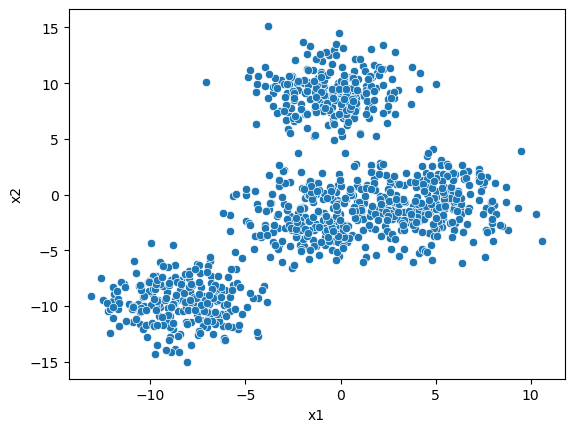

In [27]:
# Scatterplot of x1 and x2
sns.scatterplot(data =df, y = "x2", x ="x1")
plt.show()

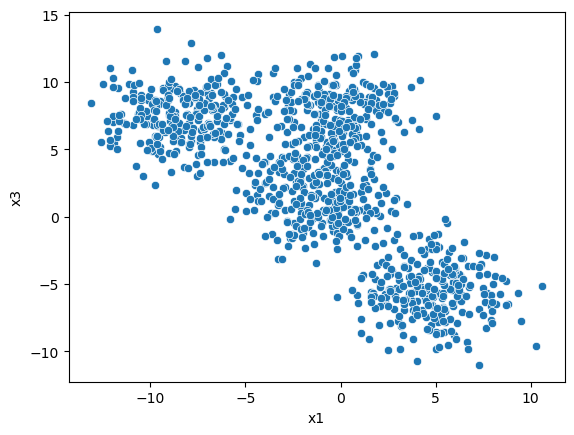

In [28]:
# Scatterplot of x1 and x3
sns.scatterplot(data =df, y = "x3", x ="x1")
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

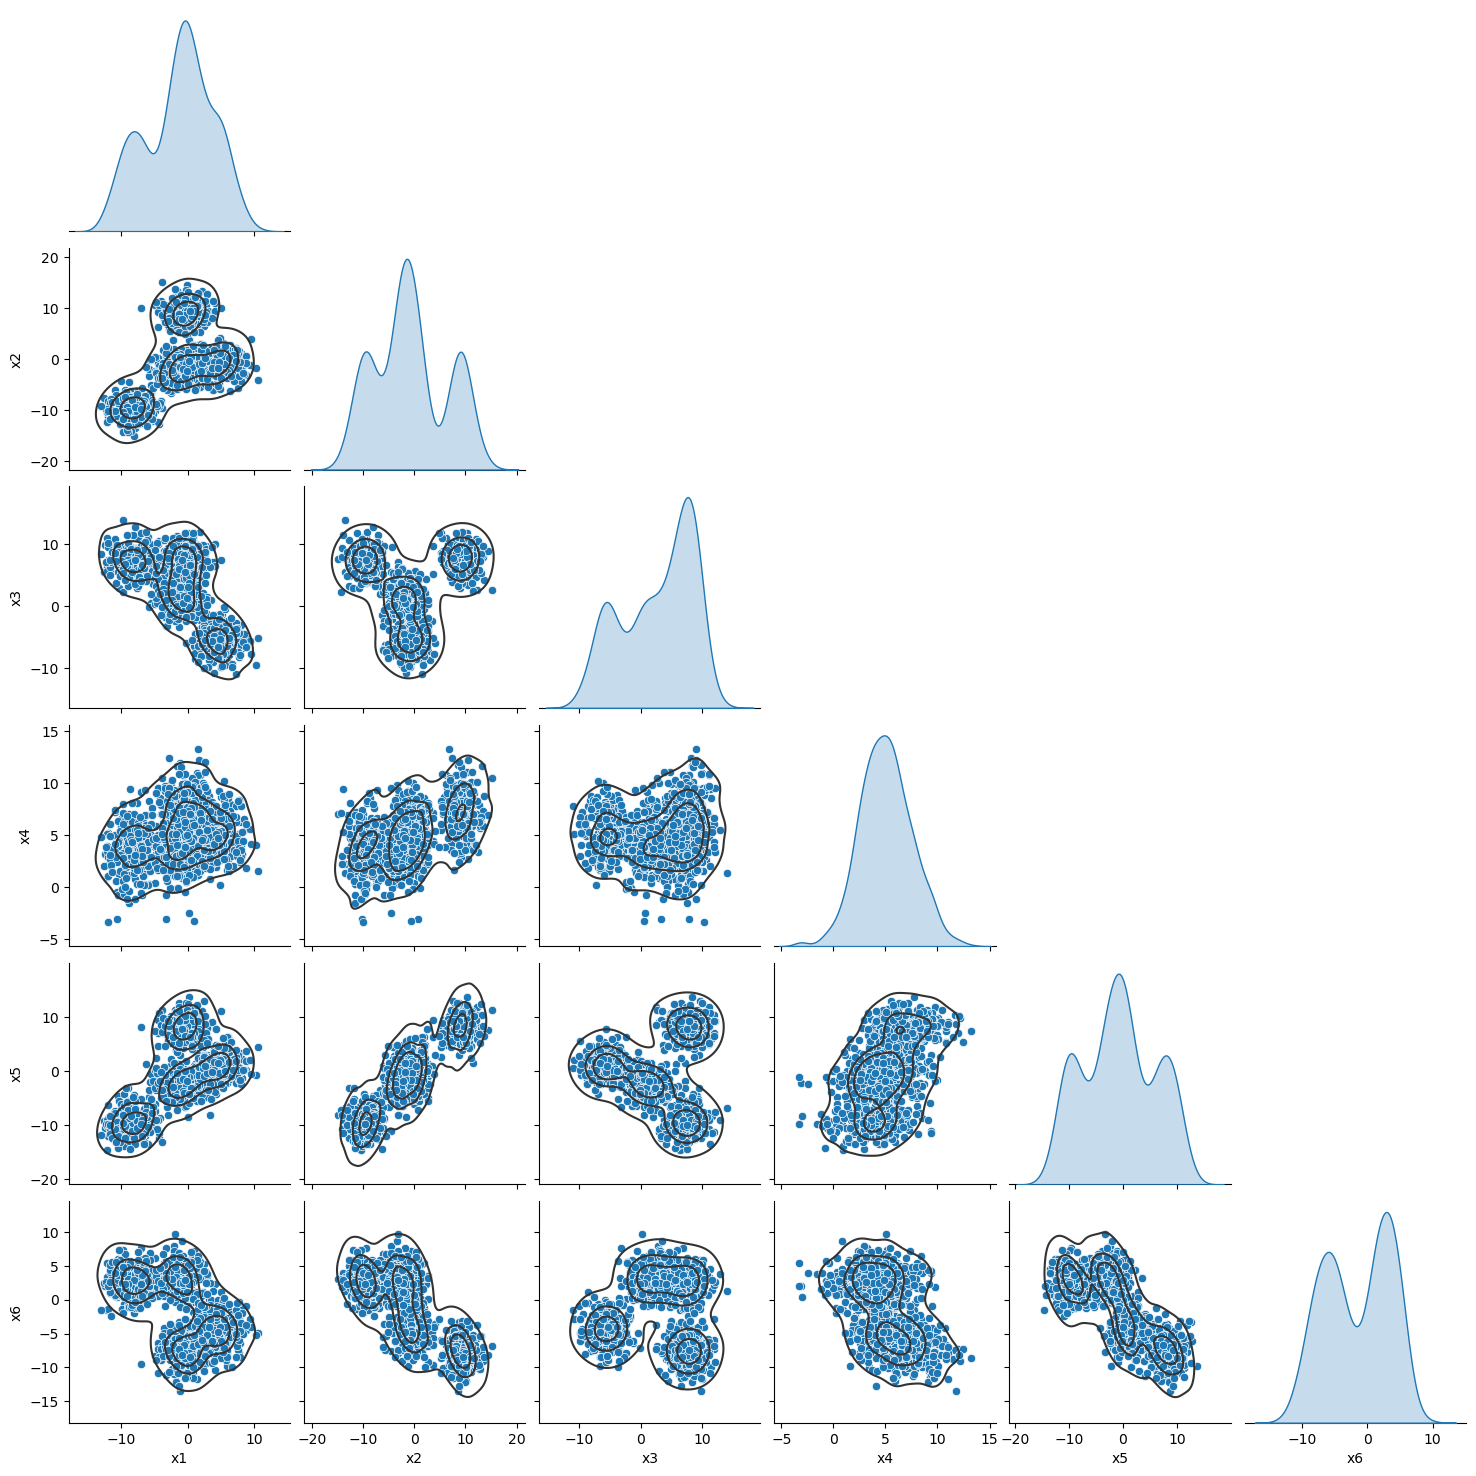

In [84]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df,corner = True, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [124]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 4 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters = K, n_init = "auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([1, 0, 0, ..., 0, 3, 3])

In [130]:
# Add a new column to the dataset with the cluster information
df["yestimated"] = yestimated
df

x1         x2        x3        x4         x5         x6  \
0     1.914825  -1.380503 -3.609674  4.236011  -5.158681   5.712978   
1     1.356415   9.767893  7.263659  8.750819   5.568930  -6.039122   
2     1.185186  11.528344  9.999419  7.890027   7.308210  -8.899397   
3    -1.739155  12.648965  7.965588  7.850296  10.235743 -10.175542   
4     7.890985  -3.210880 -7.672016  2.438106   3.310904  -3.308334   
...        ...        ...       ...       ...        ...        ...   
1019  3.685106  -1.715503 -5.674443  6.510551  -0.121862  -6.166649   
1020 -7.014173  -9.697874  4.093272 -0.590262  -9.882245   2.339336   
1021 -2.993762   7.528182  7.877165  8.895835   9.318544  -7.445100   
1022  4.576644  -1.720788 -6.581909  4.745839   1.497980  -4.828975   
1023  2.616634   0.274593 -5.521864  9.582110   0.878266  -8.274990   

      yestimated  
0              1  
1              0  
2              0  
3              0  
4              3  
...          ...  
1019           3  
1020           2  
1021           0  
1022           3  
1023           3  

[1024 rows x 7 columns]

In [131]:
# Laber of the estimated clusters
df.yestimated.unique()

array([1, 0, 3, 2])

In [132]:
# Cluster centroides
km.cluster_centers_


array([[-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ,  1.        ],
       [-1.11162986, -1.97482508,  1.3833106 ,  3.93069765, -2.6359108 ,
         3.22632658,  3.        ],
       [-8.40571071, -9.65151928,  7.45044683,  3.77380481, -9.50855366,
         2.66099801,  0.        ],
       [ 4.75634768, -0.75290959, -5.5798822 ,  5.20729319,  1.024779  ,
        -4.30453201,  2.        ]])

In [133]:
# Sum of squared error (sse) of the final model
km.inertia_

24421.758911237903

In [134]:
# The number of iterations required to converge
km.n_iter_

2

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

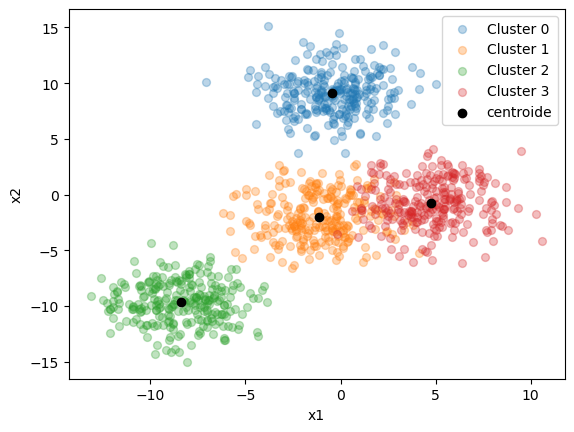

In [135]:
# Get a dataframe with the data of each clsuter

df0 = df[df.yestimated ==0]
df1 = df[df.yestimated ==1]
df2 = df[df.yestimated ==2]
df3 = df[df.yestimated ==3]

# Scatter plot of each cluster

plt.scatter(df0.x1, df0.x2, label = "Cluster 0", marker="o", s=32, alpha=0.3)
plt.scatter(df1.x1, df1.x2, label = "Cluster 1", marker="o", s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 2", marker="o", s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label = "Cluster 3", marker="o", s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="black", label = "centroide")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [138]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    km = KMeans(n_clusters = k, n_init = "auto")
    km.fit_predict(df[["x1", "x2"]])
    sse.append(km.inertia_)

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

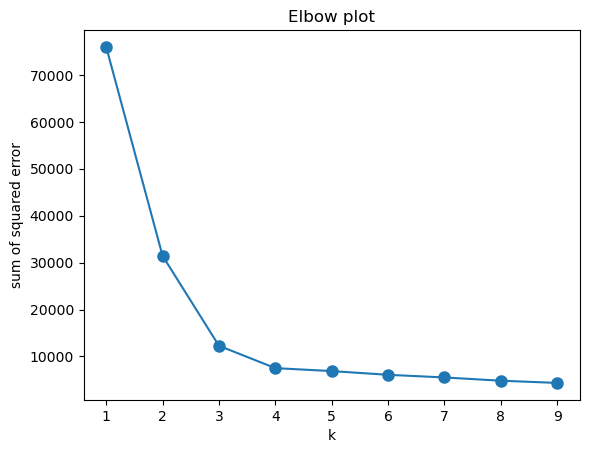

In [140]:
# Plot sse versus k
plt.plot(k_rng, sse, "o-", markersize = 8)
plt.title("Elbow plot")
plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


In [222]:
url = "datasets/iris/iris.csv"
df  = pd.read_csv(url, header = None)
df.columns = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"]
df_copy = df.copy()
df_copy.drop(df_copy.columns[[]], axis = 1, inplace = True)
df_copy.iloc[:, -1] = df_copy.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})
df_copy

C:\Users\nessy\AppData\Local\Temp\ipykernel_11580\3942457369.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.iloc[:, -1] = df_copy.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})


PetalWidth  PetalLength  SepalWidth  SepalLength  Type
0           5.1          3.5         1.4          0.2     1
1           4.9          3.0         1.4          0.2     1
2           4.7          3.2         1.3          0.2     1
3           4.6          3.1         1.5          0.2     1
4           5.0          3.6         1.4          0.2     1
..          ...          ...         ...          ...   ...
145         6.7          3.0         5.2          2.3     3
146         6.3          2.5         5.0          1.9     3
147         6.5          3.0         5.2          2.0     3
148         6.2          3.4         5.4          2.3     3
149         5.9          3.0         5.1          1.8     3

[150 rows x 5 columns]

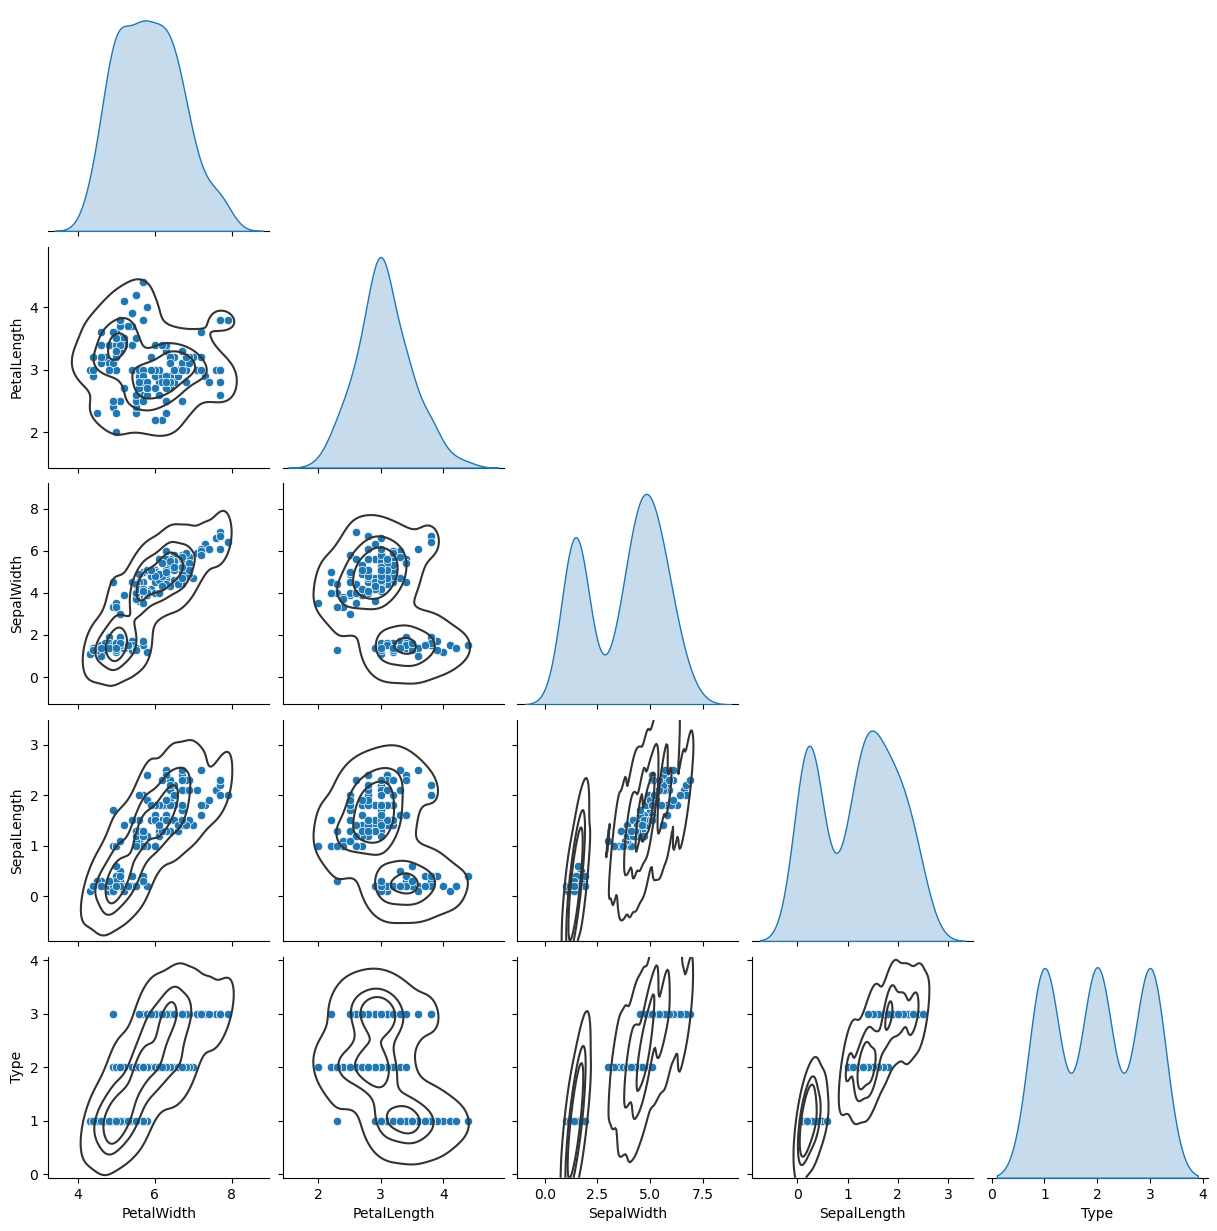

In [223]:
g = sns.pairplot(df_copy,corner = True, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

In [224]:
K  = 3
km = KMeans(n_clusters = K, n_init = "auto")
yestimated = km.fit_predict(df_copy)
df_copy["yestimated"] = yestimated
yestimated

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

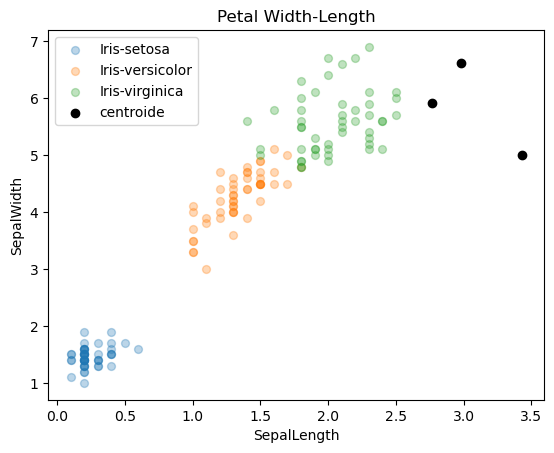

In [225]:
df_copy0 = df_copy[df_copy.yestimated ==0]
df_copy1 = df_copy[df_copy.yestimated ==1]
df_copy2 = df_copy[df_copy.yestimated ==2]

# Scatter plot of each cluster
types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.scatter(df_copy0.SepalLength, df_copy0.SepalWidth, label = types[0], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy1.SepalLength, df_copy1.SepalWidth, label = types[1], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy2.SepalLength, df_copy2.SepalWidth, label = types[2], marker="o", s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color="black", label = "centroide")

plt.title("Petal Width-Length")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend()
plt.show()

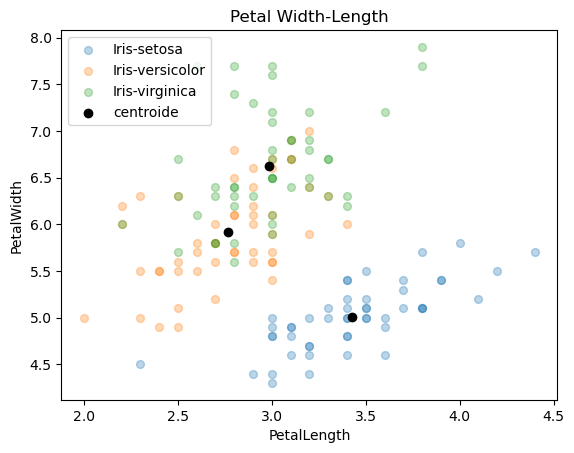

In [226]:
# Scatter plot of each cluster
types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.scatter(df_copy0.PetalLength, df_copy0.PetalWidth, label = types[0], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy1.PetalLength, df_copy1.PetalWidth, label = types[1], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy2.PetalLength, df_copy2.PetalWidth, label = types[2], marker="o", s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color="black", label = "centroide")

plt.title("Petal Width-Length")
plt.xlabel("PetalLength")
plt.ylabel("PetalWidth")
plt.legend()
plt.show()

In [227]:
df_copy_2 = df.copy()
df_copy_2.drop(df_copy_2.columns[[0,1]], axis = 1, inplace = True)
df_copy_2.iloc[:, -1] = df_copy.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})
df_copy_2

C:\Users\nessy\AppData\Local\Temp\ipykernel_11580\606419158.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy_2.iloc[:, -1] = df_copy.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})


SepalWidth  SepalLength  Type
0           1.4          0.2     0
1           1.4          0.2     0
2           1.3          0.2     0
3           1.5          0.2     0
4           1.4          0.2     0
..          ...          ...   ...
145         5.2          2.3     2
146         5.0          1.9     2
147         5.2          2.0     2
148         5.4          2.3     2
149         5.1          1.8     2

[150 rows x 3 columns]

In [228]:
K  = 3
km = KMeans(n_clusters = K, n_init = "auto")
yestimated = km.fit_predict(df_copy_2)
df_copy_2["yestimated"] = yestimated
yestimated

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

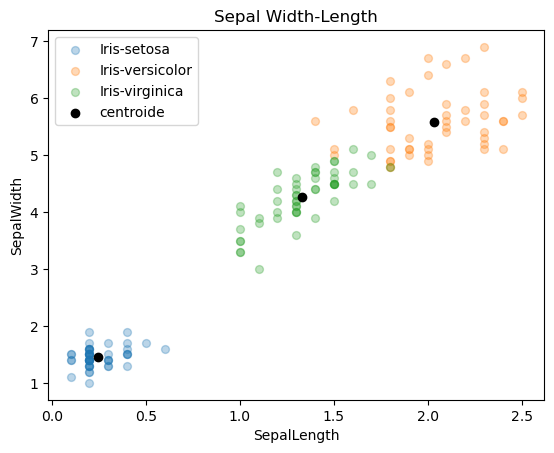

In [229]:

df_copy0 = df_copy_2[df_copy_2.yestimated ==0]
df_copy1 = df_copy_2[df_copy_2.yestimated ==1]
df_copy2 = df_copy_2[df_copy_2.yestimated ==2]

# Scatter plot of each cluster
types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.scatter(df_copy0.SepalLength, df_copy0.SepalWidth, label = types[0], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy1.SepalLength, df_copy1.SepalWidth, label = types[1], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy2.SepalLength, df_copy2.SepalWidth, label = types[2], marker="o", s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color="black", label = "centroide")

plt.title("Sepal Width-Length")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend()
plt.show()

In [231]:
df_copy_3 = df.copy()
df_copy_3.drop(df_copy_3.columns[[2,3]], axis = 1, inplace = True)
df_copy_3.iloc[:, -1] = df_copy.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})
df_copy_3

C:\Users\nessy\AppData\Local\Temp\ipykernel_11580\3883439214.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy_3.iloc[:, -1] = df_copy.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})


PetalWidth  PetalLength  Type
0           5.1          3.5     0
1           4.9          3.0     0
2           4.7          3.2     0
3           4.6          3.1     0
4           5.0          3.6     0
..          ...          ...   ...
145         6.7          3.0     2
146         6.3          2.5     2
147         6.5          3.0     2
148         6.2          3.4     2
149         5.9          3.0     2

[150 rows x 3 columns]

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


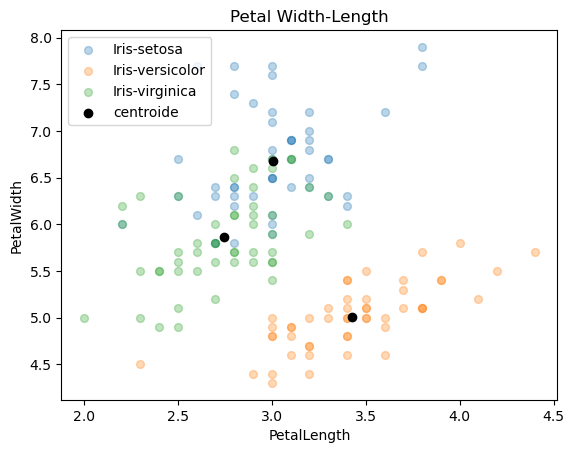

In [232]:
K  = 3
km = KMeans(n_clusters = K, n_init = "auto")
yestimated = km.fit_predict(df_copy_3)
df_copy_3["yestimated"] = yestimated


df_copy0 = df_copy_3[df_copy_3.yestimated ==0]
df_copy1 = df_copy_3[df_copy_3.yestimated ==1]
df_copy2 = df_copy_3[df_copy_3.yestimated ==2]

# Scatter plot of each cluster
types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.scatter(df_copy0.PetalLength, df_copy0.PetalWidth, label = types[0], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy1.PetalLength, df_copy1.PetalWidth, label = types[1], marker="o", s=32, alpha=0.3)
plt.scatter(df_copy2.PetalLength, df_copy2.PetalWidth, label = types[2], marker="o", s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color="black", label = "centroide")

plt.title("Petal Width-Length")
plt.xlabel("PetalLength")
plt.ylabel("PetalWidth")
plt.legend()
plt.show()